In [1]:
#from __future__ import division
#%matplotlib inline
import numpy as np, scipy as sp, seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive

In [2]:
def unmixed(x,GA0=1.0,GB0=2.0):
    return (1-x)*GA0 + x*GB0

R = 8.31
def deltaS_mixing(x):
    return -R*(x*np.log(x) + (1-x)*np.log(1-x))

def idealmixed(x,T,GA0=1.0,GB0=2.0):
    return unmixed(x,GA0,GB0) - T*deltaS_mixing(x)


In [3]:
def showideal(T):
    plt.clf()
    x = np.linspace(0,1,1000)
    legloc = 'lower right'
    plt.plot(x,unmixed(x),label="unmixed")
    plt.title("Ideal Mixture")
    plt.xlabel("fraction B")
    plt.ylabel("G")
    plt.plot(x,idealmixed(x,T),label="T=%3.1f"%T)
    plt.legend(loc=legloc)
    plt.show()

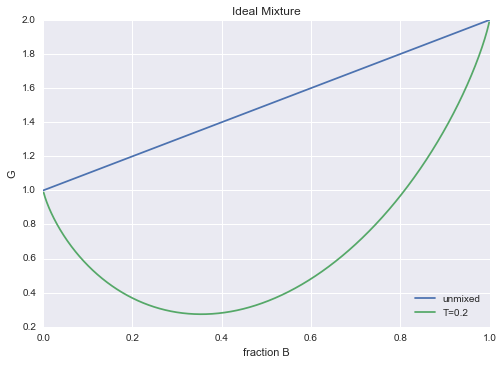

In [4]:
showideal(T=0.2)

In [5]:
interact(showideal,T=(0,1,0.01))

<function __main__.showideal>

Let's choose some values to look like Fig 5.30

## Nonideal mixtures

In [6]:
def deltaU_mixing(x):
    umax = 2.0
    return (.25 - (x-0.5)**2)*umax/.25

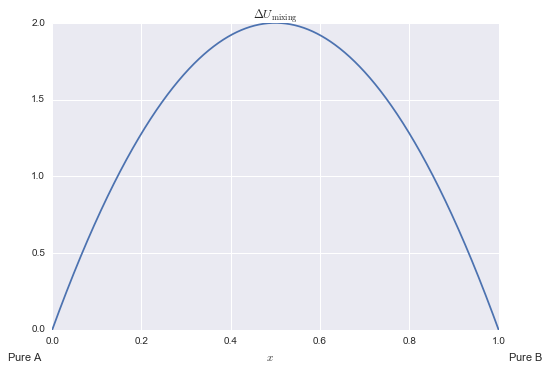

In [7]:
plt.plot(np.linspace(0,1,1000),deltaU_mixing(np.linspace(0,1,1000)))
plt.title("$\Delta U_{\mathrm{mixing}}$")
plt.xlabel("Pure A\t\t\t\t\t\t\t\t\t\t$x$\t\t\t\t\t\t\t\t\t\tPure B")
plt.show()

In [11]:
def nonidealmixed(x,T):
    return idealmixed(x,T) + deltaU_mixing(x)

def comparemixing(T=0.0):
    plt.clf()
    x = np.linspace(0,1,1000)
    legloc = 'lower right'
    plt.subplot(121)
    plt.plot(x,unmixed(x),label="unmixed")
    plt.title("Ideal Mixture")
    plt.xlabel("fraction B")
    plt.ylabel("G")
    plt.plot(x,idealmixed(x,T),label="T=%3.1f"%T)
    plt.legend(loc=legloc)

    plt.subplot(122)
    plt.plot(x,unmixed(x),label="unmixed")
    plt.title("Non-ideal Mixture")
    plt.xlabel("fraction B")
    plt.ylabel("G")
    plt.plot(x,nonidealmixed(x,T),label="T=%3.1f"%T)
    plt.legend(loc=legloc)
    plt.show()


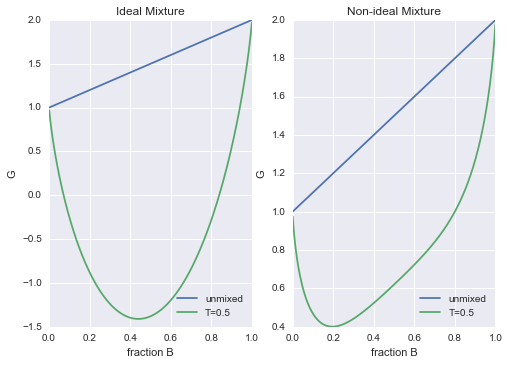

In [12]:
comparemixing(T=0.5)

In [13]:
interact(comparemixing,T=(0,1,0.01))

<function __main__.comparemixing>

## Now, phase changes of miscible mixtures

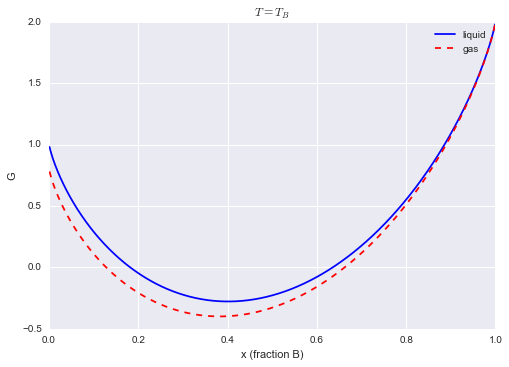

In [14]:
T = 0.3
x = np.linspace(0,1,1000)
plt.plot(x,idealmixed(x,T,GA0=1.0,GB0=2.0),'b-', label='liquid')
plt.plot(x,idealmixed(x,T,GA0=0.8,GB0=2.0),'r--', label='gas')
plt.legend()
plt.xlabel('x (fraction B)')
plt.ylabel('G')
plt.title('$T=T_B$')
plt.show()

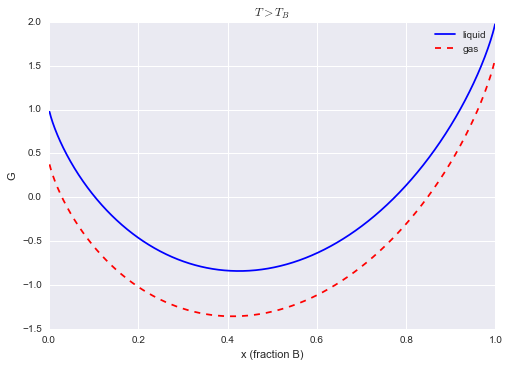

In [15]:
T = 0.4
x = np.linspace(0,1,1000)
plt.plot(x,idealmixed(x,T,GA0=1.0,GB0=2.0),'b-', label='liquid')
plt.plot(x,idealmixed(x,T,GA0=0.4,GB0=1.6),'r--', label='gas')
plt.legend()
plt.xlabel('x (fraction B)')
plt.ylabel('G')
plt.title('$T>T_B$')
plt.show()

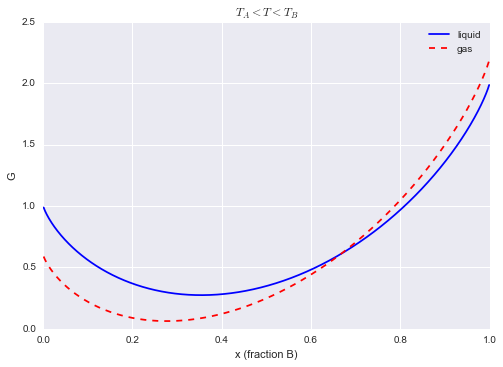

In [16]:
T = 0.2
x = np.linspace(0,1,1000)
plt.plot(x,idealmixed(x,T,GA0=1.0,GB0=2.0),'b-', label='liquid')
plt.plot(x,idealmixed(x,T,GA0=0.6,GB0=2.2),'r--', label='gas')
plt.legend()
plt.xlabel('x (fraction B)')
plt.ylabel('G')
plt.title('$T_A<T<T_B$')
plt.show()

In [17]:
def plotmixture(T=0.2,GA0liquid=1.0,GB0liquid=2.0,GA0gas=0.6,GB0gas=2.2):
    x = np.linspace(0,1,1000)
    plt.plot(x,idealmixed(x,T,GA0liquid,GB0liquid),'b-', label='liquid')
    plt.plot(x,idealmixed(x,T,GA0gas,GB0gas),'r--', label='gas')
    plt.legend()
    plt.xlabel('x (fraction B)')
    plt.ylabel('G')
    plt.show()

In [18]:
interact(plotmixture,T=(0,1,0.1),GA0liquid=(0,2,0.1),GB0liquid=(0,2,0.1),
         GA0gas=(0,2,0.1),GB0gas=(0,2,0.1))

<function __main__.plotmixture>